In [1]:
%pip install xlwt xlrd

     |████████████████████████████████| 99 kB 2.8 MB/s eta 0:00:011
     |████████████████████████████████| 103 kB 7.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Creating Data

## Creating sample dataframes using Pandas library

In [2]:
# import pandas library - we also import numpy for use in a couple examples
import pandas as pd
import numpy as np

Pandas is an open-source Python library used for data analysis. Here we will use it to create sample data to demostrate how it works. 

More info here: https://pandas.pydata.org/

Firstly, check the version numbers of both:

In [3]:
pd.__version__

'0.25.3'

In [4]:
np.__version__

'1.18.1'

In [5]:
pd?

In [6]:
%pwd

'/home/jovyan'

In [7]:
%ls

'Creating, Cleaning and Reading Data.ipynb'  'Python Basics 2.ipynb'
 img/                                        'Python Basics 3.ipynb'
'Python Basics 1.ipynb'                       requirements.txt


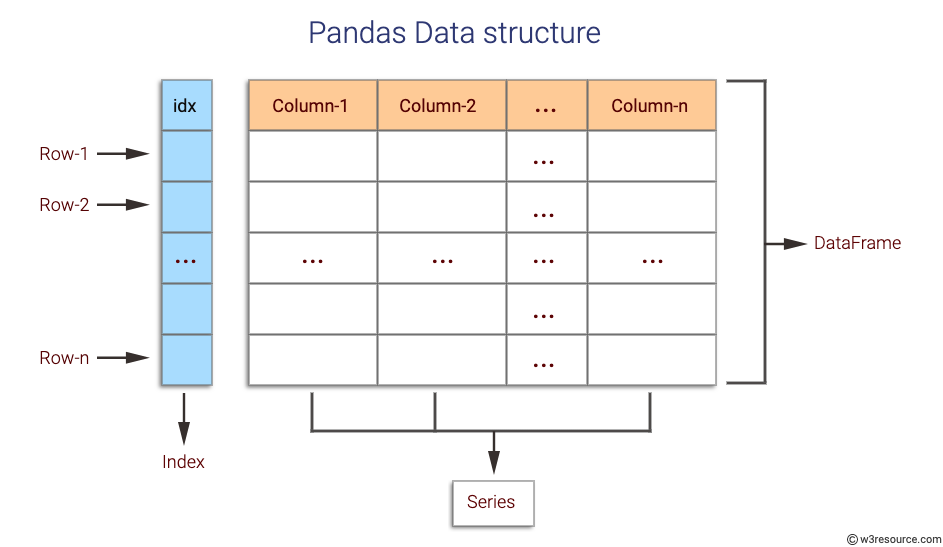

In [9]:
from IPython.display import Image
Image('img/Pandas_DataFrame.png')

<strong>Series</strong>

In [10]:
s = pd.Series([1, 3, 5, 6, np.nan, 8]) # A one-dimensional array/list

In [11]:
s

0    1.0
1    3.0
2    5.0
3    6.0
4    NaN
5    8.0
dtype: float64

Using <strong>np.nan</strong> we can enter a null/missing value

In [12]:
s[3]

6.0

We can add our own index using strings:

In [13]:
s = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['Value 1', 'Value 2', 'Value 3', 'Value 4'])


In [14]:
s

Value 1    0.25
Value 2    0.50
Value 3    0.75
Value 4    1.00
dtype: float64

And then access by index

In [15]:
s['Value 1']

0.25

<strong>DataFrames</strong>

Two-dimensional tabular data

Creating a DataFrame from Python dictionaries:

In [16]:
df = pd.DataFrame({
    'Height in cm': [180,np.nan,175,170,159],
    'Weight in kg': [90,89,77,69,np.nan],
    'Names': ['Bob', 'Sue', 'Muhammed', 'Jin', 'Brittany']
    })

In [17]:
df

,Height in cm,Weight in kg,Names
0,180.0,90.0,Bob
1,NaN,89.0,Sue
2,175.0,77.0,Muhammed
3,170.0,69.0,Jin
4,159.0,NaN,Brittany


Show the first n rows:

In [18]:
df.head(2)

,Height in cm,Weight in kg,Names
0,180.0,90.0,Bob
1,NaN,89.0,Sue


Show the last n rows:

In [19]:
df.tail(2)

,Height in cm,Weight in kg,Names
3,170.0,69.0,Jin
4,159.0,NaN,Brittany


Get details fo DataFrame:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
Height in cm    4 non-null float64
Weight in kg    4 non-null float64
Names           5 non-null object
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


Get stats for the DataFrame:

In [21]:
df.describe()

,Height in cm,Weight in kg
count,4.000000,4.000000
mean,171.000000,81.250000
std,8.981462,10.078856
min,159.000000,69.000000
25%,167.250000,75.000000
50%,172.500000,83.000000
75%,176.250000,89.250000
max,180.000000,90.000000


Indexes and columns

In [22]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [23]:
df.columns

Index(['Height in cm', 'Weight in kg', 'Names'], dtype='object')

In [24]:
df.set_index('Names') # Uses the Names values as the index

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


In [25]:
df['Height in cm']

0    180.0
1      NaN
2    175.0
3    170.0
4    159.0
Name: Height in cm, dtype: float64

In [26]:
df['Weight in kg']

0    90.0
1    89.0
2    77.0
3    69.0
4     NaN
Name: Weight in kg, dtype: float64

In [27]:
df # Original DataFrame has not been modified

,Height in cm,Weight in kg,Names
0,180.0,90.0,Bob
1,NaN,89.0,Sue
2,175.0,77.0,Muhammed
3,170.0,69.0,Jin
4,159.0,NaN,Brittany


If we want to keep our new DataFrame we can store in a variable:

In [28]:
names_as_index = df.set_index('Names')

In [29]:
names_as_index 

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


Alternatively, we can change DataFrame 'in-place':

In [30]:
df.set_index('Names', inplace=True)

In [31]:
df

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


In [32]:
df.index

Index(['Bob', 'Sue', 'Muhammed', 'Jin', 'Brittany'], dtype='object', name='Names')

We can define Python functions and apply them to our data using <strong>apply()</strong>:

In [33]:
def mySq(x):
    return x * x

In [34]:
df['Height in cm'].sum()

684.0

In [35]:
def myExp(x, e):
    return x ** e

In [36]:
df['Height in cm'].apply(myExp, e=4)

Names
Bob         1.049760e+09
Sue                  NaN
Muhammed    9.378906e+08
Jin         8.352100e+08
Brittany    6.391290e+08
Name: Height in cm, dtype: float64

# loc and iloc

The <strong>loc</strong> attribute allows indexing and slicing using explicit index. The <strong>iloc</strong> attribute allows indexing and slicing that always references the implicit Python-style index:

In [37]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])

In [38]:
data

1    a
3    b
5    c
dtype: object

In [39]:
data.iloc[0]

'a'

In [40]:
data.iloc[0]

'a'

# Cleaning Data

## Dealing with missing/null values

In [41]:
df

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


In [42]:
df.isnull()

,Height in cm,Weight in kg
Names,,
Bob,False,False
Sue,True,False
Muhammed,False,False
Jin,False,False
Brittany,False,True


In [43]:
df.notnull()

,Height in cm,Weight in kg
Names,,
Bob,True,True
Sue,False,True
Muhammed,True,True
Jin,True,True
Brittany,True,False


In [44]:
df.isnull().sum(axis='columns')

Names
Bob         0
Sue         1
Muhammed    0
Jin         0
Brittany    1
dtype: int64

In [45]:
df.isnull().sum(axis='rows')

Height in cm    1
Weight in kg    1
dtype: int64

In [46]:
df[df['Height in cm'].isnull()]

,Height in cm,Weight in kg
Names,,
Sue,NaN,89.0


In [47]:
df[df['Weight in kg'].isnull()]

,Height in cm,Weight in kg
Names,,
Brittany,159.0,NaN


In [48]:
df.dropna(how='any') # Drop all rows with any NaN values

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Muhammed,175.0,77.0
Jin,170.0,69.0


In [49]:
df # Original DataFrame still there

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


In [50]:
df.dropna(how='all') # Drop all rows with all NaN values

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.0
Sue,NaN,89.0
Muhammed,175.0,77.0
Jin,170.0,69.0
Brittany,159.0,NaN


In [51]:
df.fillna('No response') # Fill the missing values with other values instead

,Height in cm,Weight in kg
Names,,
Bob,180,90
Sue,No response,89
Muhammed,175,77
Jin,170,69
Brittany,159,No response


In [52]:
df.fillna(df.mean()) # Replace all null values with the mean 

,Height in cm,Weight in kg
Names,,
Bob,180.0,90.00
Sue,171.0,89.00
Muhammed,175.0,77.00
Jin,170.0,69.00
Brittany,159.0,81.25


# Reading Data


## Loading .csv files

Firstly, I'm going to create the .csv file from a DataFrame. 

This step is not neccesary but helps if we have trouble loading data in the session

In [53]:
going_to_make_this_a_csv = pd.DataFrame({
        'Column 1': [1,2,3,4,5],
        'Column 2': ['One','Two','Three','Four','Five'],
        'Observer': ['Bob', 'Sue', 'Muhammed', 'Jin', 'Brittany']
})

In [54]:
my_csv = going_to_make_this_a_csv.set_index('Observer')

In [55]:
my_csv.to_csv('i_made_this.csv') # Use to_csv() to output DataFrame to .csv file

In [56]:
%ls i*

i_made_this.csv

img:
Pandas_DataFrame.png


In [57]:
my_csv = pd.read_csv('i_made_this.csv')

In [58]:
my_csv

,Observer,Column 1,Column 2
0,Bob,1,One
1,Sue,2,Two
2,Muhammed,3,Three
3,Jin,4,Four
4,Brittany,5,Five


In [59]:
my_csv.columns = ['Observer', 'Value One', 'Value Two'] # Change column header names

In [60]:
my_csv

,Observer,Value One,Value Two
0,Bob,1,One
1,Sue,2,Two
2,Muhammed,3,Three
3,Jin,4,Four
4,Brittany,5,Five


## Outputting to and Loading Excel spreadsheets

In [61]:
going_to_make_this_an_excel_spreadsheet = pd.DataFrame({
        'Column 1': [5,4,3,2,1],
        'Column 2': ['Five','Four','Three','Two','One'],
        'Observer': ['Brian', 'Claire', 'Jayashree', 'Erfan', 'Pablo']
})

In [62]:
going_to_make_this_an_excel_spreadsheet.to_excel('i_made_this_spreadsheet.xls') # .xls or .xlsx extenionsion required

In [63]:
%ls i_made*

i_made_this.csv  i_made_this_spreadsheet.xls


In [64]:
my_excel = pd.read_excel('i_made_this_spreadsheet.xls')

In [65]:
my_excel

,Unnamed: 0,Column 1,Column 2,Observer
0,0,5,Five,Brian
1,1,4,Four,Claire
2,2,3,Three,Jayashree
3,3,2,Two,Erfan
4,4,1,One,Pablo


In [66]:
my_excel.drop(columns=['Unnamed: 0'])

,Column 1,Column 2,Observer
0,5,Five,Brian
1,4,Four,Claire
2,3,Three,Jayashree
3,2,Two,Erfan
4,1,One,Pablo


## JSON or HTML anyone?

In [67]:
my_excel.to_json('json_representation.json')

In [68]:
my_excel.to_html('html_representation.html')

# Transforming and Aggregating

In [69]:
import seaborn as sns # Importing seaborn library as it contains a built-in dataset

In [70]:
tips = sns.load_dataset('tips')

In [71]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [72]:
mean_tip_by_sex = tips.groupby('sex')['tip'].aggregate('mean').rename("Mean Tip").reset_index()


In [73]:
mean_tip_by_sex

,sex,Mean Tip
0,Male,3.089618
1,Female,2.833448


In [74]:
mean_tip_by_sex

,sex,Mean Tip
0,Male,3.089618
1,Female,2.833448


In [75]:
mean_tip_by_day = tips.groupby('day')['tip'].aggregate('mean').rename("Mean Tip").reset_index()

In [76]:
mean_tip_by_day

,day,Mean Tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


# TASKS

In [77]:
Image('img/Pandas_Groupby.png')

FileNotFoundError: No such file or directory: 'img/Pandas_Groupby.png'

FileNotFoundError: No such file or directory: 'img/Pandas_Groupby.png'

<IPython.core.display.Image object>

<strong>TASK:</strong> Re-create the 'orders' table above (labelled 'Input') as a DataFrame

In [78]:
df = pd.DataFrame({'account': [383080, 383080, 383080, 412290, 412290, 412290, 412290, 412290, 218895, 218895, 218895, 218895],
                   'order':   [10001, 10001, 10001, 10005, 10005, 10005, 10005, 10005, 10006, 10006, 10006, 10006],
                   'ext price': [235.83, 232.32, 107.97, 2679.36, 286.02, 832.95, 3472.04, 915.12, 3061.12, 518.65, 216.9, -72.18]})

<strong>TASK:</strong> Use pandas head method to show the top 10 rows of the DataFrame



In [79]:
df.head(10)

,account,order,ext price
0,383080,10001,235.83
1,383080,10001,232.32
2,383080,10001,107.97
3,412290,10005,2679.36
4,412290,10005,286.02
5,412290,10005,832.95
6,412290,10005,3472.04
7,412290,10005,915.12
8,218895,10006,3061.12
9,218895,10006,518.65


<strong>TASK:</strong> Use pandas to get info on datatypes contained in DataFrame

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
account      12 non-null int64
order        12 non-null int64
ext price    12 non-null float64
dtypes: float64(1), int64(2)
memory usage: 416.0 bytes


<strong>TASK:</strong> Get some basic descriptive statistics
    

In [81]:
df.describe()

,account,order,ext price
count,12.000000,12.000000,12.000000
mean,340522.500000,10004.333333,1040.508333
std,90633.772416,2.059715,1267.357787
min,218895.000000,10001.000000,-72.180000
25%,218895.000000,10004.000000,228.465000
50%,383080.000000,10005.000000,402.335000
75%,412290.000000,10006.000000,1356.180000
max,412290.000000,10006.000000,3472.040000


<strong>TASK:</strong> Use the groupby() function to get a result the same as the table labelled 'Combine'

In [82]:
df.groupby('order')["ext price"].sum().reset_index()

,order,ext price
0,10001,576.12
1,10005,8185.49
2,10006,3724.49
